In [ ]:
pip install scipy


In [ ]:
from scipy import integrate
result,error=integrate.quad(lambda x:x**2,0,1)
print("Result:",result)
print("Error:",error)

Result: 0.33333333333333337
Error: 3.700743415417189e-15


In [ ]:
square=lambda x:x**2
result=square(5)
print(result)

25


In [ ]:
import numpy as np
from scipy import optimize
result_optimization=optimize.minimize_scalar(lambda x : x**2 + 3*x +5)
print("Optimization Result:",result_optimization.x)

Optimization Result: -1.5000000000000002


Interpolation Result: 2.0


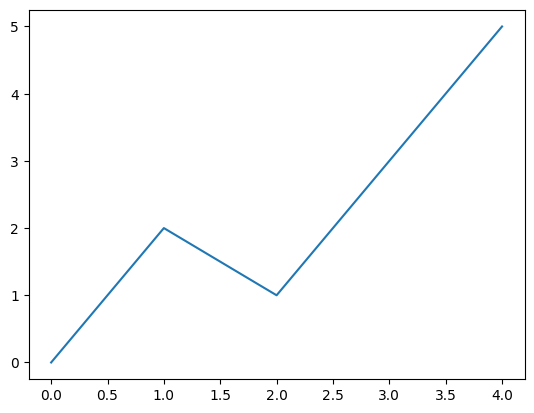

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x_data=np.array([0,1,2,3,4])
y_data=np.array([0,2,1,3,5])
interp_func=interpolate.interp1d(x_data,y_data,kind='linear')
interp_result=interp_func(2.5)
print("Interpolation Result:",interp_result)
plot=plt.plot(x_data,y_data)

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
import random
random.seed(0)
print(random.random())
print(random.random())

0.8444218515250481
0.7579544029403025


In [ ]:
np.random.seed(0)
data=pd.DataFrame({
    'Treatment':np.random.choice(['A','B','c'],size=100),
    'Score':np.random.normal(loc=10,scale=2,size=100)
})
print(data)

   Treatment      Score
0          A   8.626821
1          B  10.029747
2          A   9.248668
3          B   9.923553
4          B  10.735949
..       ...        ...
95         A   9.933528
96         c  10.131283
97         A  10.531571
98         B  12.303684
99         c  10.276086

[100 rows x 2 columns]


In [12]:
np.random.seed(0)
data = pd.DataFrame({
    'doreamon': np.random.normal(loc=12,scale=3,size=10),
    'kick': np.random.normal(loc=10,scale=2,size=10)
})
print(data)
a=data['doreamon'].mean()
print(a)
b=data['kick'].mean()
print(b)
group_A = data['doreamon']
group_B =data['kick']
t_stat, p_value = stats.ttest_ind(group_A, group_B)
print("t-statistic:",t_stat)
print("p-value:",p_value)

    doreamon       kick
0  17.292157  10.288087
1  13.200472  12.908547
2  14.936214  11.522075
3  18.722680  10.243350
4  17.602674  10.887726
5   9.068166  10.667349
6  14.850265  12.988158
7  11.545928   9.589683
8  11.690343  10.626135
9  13.231796   8.291809
14.214069512186503
10.80129203032487
t-statistic: 3.2008779121969564
p-value: 0.004952921884935413


In [13]:
np.random.seed(0)
data=pd.DataFrame({
    'Treatment':np.random.choice(['A','B','c'],size=100),
    'Score':np.random.normal(loc=10,scale=2,size=100)
})
print(data)

   Treatment      Score
0          A   8.626821
1          B  10.029747
2          A   9.248668
3          B   9.923553
4          B  10.735949
..       ...        ...
95         A   9.933528
96         c  10.131283
97         A  10.531571
98         B  12.303684
99         c  10.276086

[100 rows x 2 columns]


In [ ]:
f_stat,p_value=stats.f_oneway(data[data['Treatment']=='A']['Score'],
                              data[data['Treatment']=='B']['Score'],
                              data[data['Treatment']=='C']['Score'])
print("F-statistic:",f_stat)
print("p-value:",p_value)

F-statistic: nan
p-value: nan


In [14]:
group_A=data[data['Treatment']=='A']['Score']
group_B=data[data['Treatment']=='B']['Score']
group_C=data[data['Treatment']=='C']['Score']
t_stat,p_value=stats.ttest_ind(group_A,group_B)
print("t_statsistic:",t_stat)
print("p_value:",p_value)

t_statsistic: -1.0341676575352792
p_value: 0.3045674995802033


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
all_data = np.concatenate([group_A, group_B, group_C])
labels = ['Group_A'] * len(group_A) + ['Group_B'] * len(group_B) + ['Group_C'] * len(group_C)
tukey_results = pairwise_tukeyhsd(all_data, labels, alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower  upper  reject
----------------------------------------------------
Group_A Group_B   0.4881 0.3046 -0.453 1.4291  False
----------------------------------------------------


In [7]:
import statsmodels.api as sm

In [17]:
X=sm.add_constant(data['Treatment'].replace({'A':0,'B':1,'C':2}))
model=sm.OLS(data['Score'],X)
results.model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [18]:
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Add a constant to the independent variable (for intercept estimation)
X = sm.add_constant(X)

# Create OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print summary of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.124
Time:                        09:28:44   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
